# Introduction to Data Science with Python

Following : https://www.youtube.com/watch?v=T5pRlIbr6gg

## Gender classifier :
- Goal : given set of measurements, classify a person as male or female 
- Data from https://www.kaggle.com/datasets/saurabhshahane/body-measurements-dataset?resource=download

In [95]:
file="./bodymeasurements.csv"

import pandas as pd
df=pd.read_csv(file)
df.head()
features = df.columns
print(features)

Index(['Gender', 'Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth ',
       'Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ',
       'WaistToKnee ', 'LegLength', 'TotalHeight'],
      dtype='object')


Measurements in inches

Male=1, Female=2

In [96]:
#Check for missing values :
import math 
def check_missing(data):
    missing=[]
    for j in range(data.shape[1]) :
        for i in range(data.shape[0]):
            if data.iloc[i,j]==None or  math.isnan(data.iloc[i,j]) :
                print('Missing value at row : ',i,'for feature', data.columns[j])
                missing.append((i,j))

    if len(missing)==0:
        print('None ! That is a good dataset.')
    return missing

df=df.drop(index=[i for i,_ in check_missing(df)])
check_missing(df)

Missing value at row :  536 for feature Gender
None ! That is a good dataset.


[]

Confusion matrix:
50 47
38 80
Accuracy: 0.6046511627906976
Recall: 0.5154639175257731
Precision: 0.5681818181818182
False positive rate: 0.3220338983050847


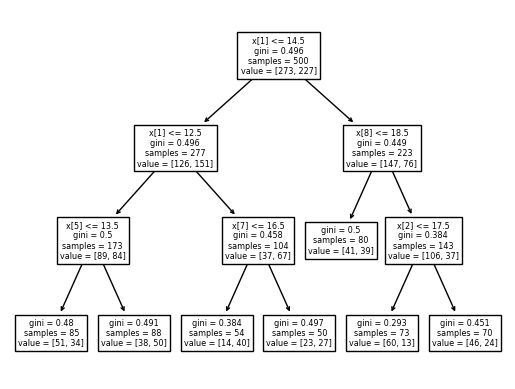

In [97]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(df[['HeadCircumference', 'ShoulderWidth', 'ChestWidth ','Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ','WaistToKnee ', 'LegLength','TotalHeight']],df['Gender'], test_size=0.30, shuffle=True, stratify=df['Gender'])
classifier=tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)
classifier=classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

def check_model(y_test, y_pred):
    true_pos=0  #Here positive = 2 = female
    true_neg=0
    false_neg=0
    false_pos=0
    for i in range(len(y_test)):
        if y_test.iloc[i]==2.0 :
            if y_pred.iloc[i]==2:
                true_pos+=1
            else:
                false_neg+=1
        else :
            if y_pred.iloc[i]==2:
                false_pos+=1
            else:
                true_neg+=1
    return true_pos, true_neg,false_neg, false_pos

tree.plot_tree(classifier)

y_pred=pd.Series(y_pred)
true_pos, true_neg,false_neg, false_pos=check_model(y_test, y_pred)
print('Confusion matrix:')
print(true_pos,false_neg)
print(false_pos,true_neg)
print('Accuracy:', (true_pos+true_neg)/(true_pos+false_neg+true_neg+false_pos) )
print('Recall:', true_pos/(true_pos+false_neg))
print('Precision:', true_pos/(true_pos+false_pos))
print('False positive rate:', false_pos/(false_pos+true_neg))


In [98]:
#Poor model with decision trees, try with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(df[['HeadCircumference', 'ShoulderWidth', 'ChestWidth ','Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ','WaistToKnee ', 'LegLength','TotalHeight']],df['Gender'], test_size=0.30, shuffle=True, stratify=df['Gender'])
classifier=LogisticRegression()
classifier=classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred=pd.Series(y_pred)


true_pos, true_neg,false_neg, false_pos=check_model(y_test, y_pred)
print('Confusion matrix:')
print(true_pos,false_neg)
print(false_pos,true_neg)
print('Accuracy:', (true_pos+true_neg)/(true_pos+false_neg+true_neg+false_pos) )
print('Recall:', true_pos/(true_pos+false_neg))
print('Precision:', true_pos/(true_pos+false_pos))
print('False positive rate:', false_pos/(false_pos+true_neg))




Confusion matrix:
46 51
34 84
Accuracy: 0.6046511627906976
Recall: 0.4742268041237113
Precision: 0.575
False positive rate: 0.288135593220339


Still poor results, maybe the data does not give a clear distinction between male and females, especially given that they often overlap

Try with age :

In [99]:
def label_age(age):
    if age <= 18:
        return '0-18'
    elif age <= 35 :
        return '19-35'
    elif age<= 50 :
        return '36-50'
    elif age <=65 :
        return '51-65'
    else :
        return '>65'

print(df['Age'].max())

for i in range(len(df)):
    df['Age'].iloc[i]=label_age(df['Age'].iloc[i])

print(df['Age'])



68
0      19-35
1      19-35
2      19-35
3      19-35
4      19-35
       ...  
711     0-18
712     0-18
713     0-18
714     0-18
715     0-18
Name: Age, Length: 715, dtype: object


C:\Users\nyoui\AppData\Local\Temp\ipykernel_30508\1966375236.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[i]=label_age(df['Age'].iloc[i])
C:\Users\nyoui\AppData\Local\Temp\ipykernel_30508\1966375236.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19-35' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Age'].iloc[i]=label_age(df['Age'].iloc[i])


In [102]:
x_train,x_test, y_train, y_test=train_test_split(df[['Gender','HeadCircumference', 'ShoulderWidth', 'ChestWidth ','Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ','WaistToKnee ', 'LegLength','TotalHeight']],df['Age'], test_size=0.30, shuffle=True)
model=LogisticRegression()
model=model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred=pd.Series(y_pred)


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred, labels=['0-18', '19-35', '36-50', '51-65', '>65'])
print(cm)

print(classification_report(y_test, y_pred))

[[146   4   2   0   0]
 [ 22  25   1   1   0]
 [  5   1   1   2   0]
 [  3   0   1   1   0]
 [  0   0   0   0   0]]
              precision    recall  f1-score   support

        0-18       0.83      0.96      0.89       152
       19-35       0.83      0.51      0.63        49
       36-50       0.20      0.11      0.14         9
       51-65       0.25      0.20      0.22         5

    accuracy                           0.80       215
   macro avg       0.53      0.45      0.47       215
weighted avg       0.79      0.80      0.78       215



c:\Users\nyoui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Better performance, probably because better repartition if measurements depending on age

In [104]:
prediction=model.predict([[2.0, 20/2.54, 30/2.54, 44/2.54,54/2.54, 55/2.54, 60/2.54,40/2.54, 40/2.54,60/2.54, 75/2.54,162/2.54]])
print(prediction)

['19-35']


c:\Users\nyoui\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


->Fair enough prediction